importing libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

data collection and processing


In [2]:
#loading csv data to a pandas dataframe
gold_data = pd.read_csv('/gld_price_data.csv')

In [3]:
#print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
#print last 5 rows of the dataframe
gold_data.tail()


,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [7]:
#number of rows and columns
gold_data.shape

(2290, 6)

In [8]:
#getting some basic information about data
gold_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [9]:
#checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [10]:
#getting the statistical measures of the data
gold_data.describe()


,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


correlation:
1.positive correlation
2.negative correlation


In [ ]:
correlation = gold_data.corr()

<Axes: >

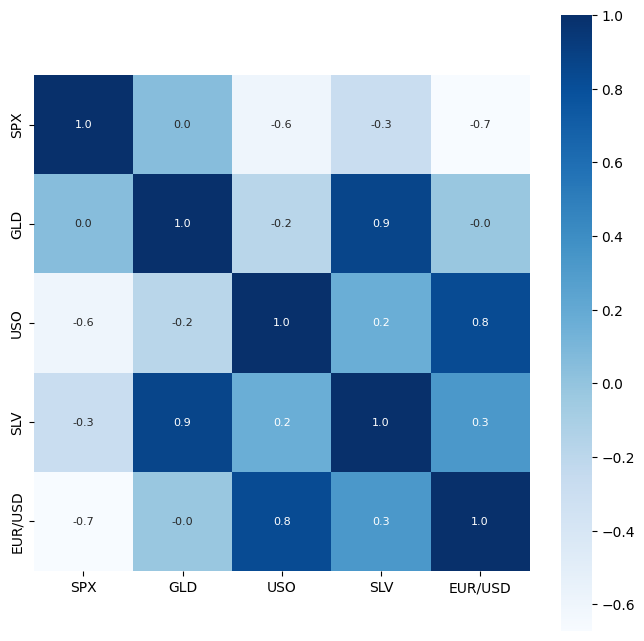

In [14]:
#constructing a heatmap to understand the correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f' ,annot=True, annot_kws={'size':8}, cmap='Blues')

In [15]:
#correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


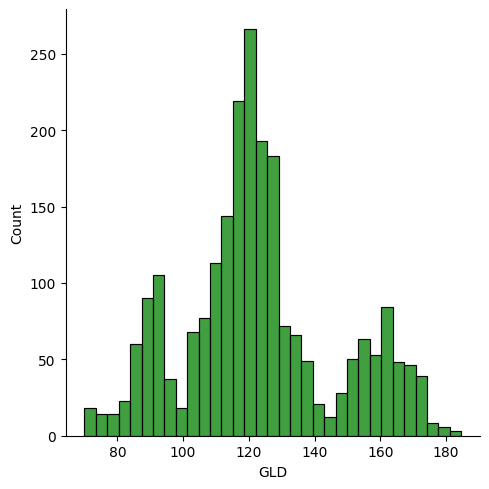

In [16]:
#checking the distribution of the GLD prices
sns.displot(gold_data['GLD'],color='green')

splitting the features and targets


In [24]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y= gold_data['GLD']

In [25]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [26]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


splitting into training data and test data


In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Model training:
Random forest Regressor

In [29]:
regressor = RandomForestRegressor(n_estimators=100)

In [31]:
#training the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

Model evaluation

In [32]:
#prediction on Test data
test_data_prediction = regressor.predict(X_test)


In [33]:
print(test_data_prediction)

[168.58279955  82.02549984 115.99860027 127.61560049 120.6191014
 154.67449826 150.08089766 126.01620059 117.45229868 125.92220107
 116.60870128 171.40430085 141.32599772 168.02169872 115.14940001
 117.59190022 138.47970322 170.23160117 159.01240287 162.75809928
 155.24230036 125.26590006 175.3985998  157.38110384 125.14010037
  93.75699969  77.92490004 120.53800002 119.05849936 167.51039946
  88.33090062 125.1803      91.01140088 117.75700053 121.02669865
 136.54930092 115.33520125 114.90100073 148.39169953 107.25000119
 103.89070248  87.13549808 126.52000021 117.95830005 152.21629904
 119.4817002  108.37369993 107.89119856  93.1853004  126.8683988
  74.63370044 113.72819915 121.2158001  111.28959914 119.01429886
 120.85399905 158.50549904 167.57870144 146.99769681  85.86789893
  94.39030052  86.80409913  90.55890004 119.05320089 126.47620054
 127.64660014 170.64450007 122.31269923 117.39449866  98.61460049
 168.69380116 142.8058994  132.10590285 121.12410224 121.53859937
 119.4814005

In [34]:
#R squared error
error_square = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ",error_square)

R squared error :  0.9897171337425029


compare the actual values and predicted values in a plot

In [35]:
Y_test = list(Y_test)

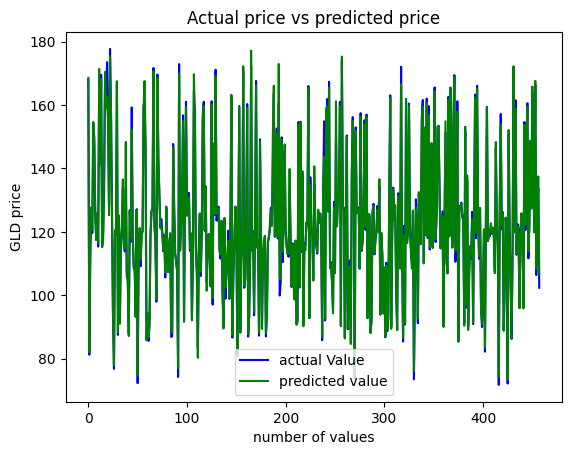

In [38]:
plt.plot(Y_test, color= 'blue' , label = 'actual Value')
plt.plot(test_data_prediction, color= 'green' , label= 'predicted value')
plt.title('Actual price vs predicted price')
plt.xlabel('number of values')
plt.ylabel('GLD price')
plt.legend()
plt.show()
